# Принадлежность точки не выпоклому многоугольнику

##  Задача

Задан многоугольник и точка, требуется определить, находится ли заданная точка внутри этого многоугольника.


##  Разминка

Предлагается взглянуть на картинку, на которой изображен многоугольник типа [кривой Пеано](https://ru.wikipedia.org/wiki/Кривая_Пеано), и попытаться ответить на вопрос — красная точка находится внутри или снаружи многоугольника?
<img src="images/peano.png">

## Описание алгоритма

Главная идея состои в том, что можно провести луч из точки и посчитать количество его пересечений с ребрами многоугольника. 

Главная проблема состоит в том, что луч может пройти через вершину многоугольника. Такой случай надо описать отдельно. Для этого, давайте считать, что ребро - интервал между вершинами, а правая вершина та, у которой координата $x$ больше. 

<img src="images/out_line.png">

Опишем идею алгоритма формально.

## Алгоритм

* Мысленно проведем вертикальный луч из данной точки.
* Посчитаем количество пересечений с ребрами многоугольника: 
    Переберем все ребра ($P_1$,$P_2$) по таким правилам $P_1x$ $<$ $P_2x$: 
    * Если точка $А$ лежит на ребре, то точка лежит в многоугольнике
    * Если у ребра $P_1x$ $=$ $P_2x$, то это будет вертикально ребро, оно не влияет на четность, пропускаем его
    * Если у ребра $A_x$ $=$ $P_2x$ и $P_2y$ $>$ $A_y$, то увеличим счетчик на $1$
    * Если у ребра $A_x$ $=$ $P_1x$, то пропускаем данное ребро
    * Если $P_1x$ $<$ $A_x$ $<$ $P_2x$ или $P_2x$ $<$ $A_x$ $<$ $P_1x$ и поворот точек $(P_1,P_2,A)$ левый, то увеличиваем счетчик пересечений на $1$,
* Если количество пересечений четно, то точка лежит вне многоугольника, иначе точка лежит внутри.

## Время работы
На каждое ребро тратится $O(1)$ времени, при этом мы проходимся по всем ребрам, чтобы проверить, пересекает ли наш луч данное ребро, значит алгоритм работает за $O(n)$, где $n$ - количество вершин (а значит и ребер) многоугольника.

## Память

Храним список вершин многоугольника, искомую вершину и $O(1)$ памяти для хранения луча, следоватльно требуемая память $O(n)$


## Упражнения

In [2]:
import solutions

## Упражнение 0

* Задача:
    * написать функцию, которая определяет поворот точки относительно прямой, образованной двумя точками
* Формат входных данных:
    * points - массив с вершинами треугольника.
    * вершина задается следующим образом: [x,y], где x и y - координаты вершины
    * p = [x, y], где x и y - координаты точки, поворот которой надо проверить
* Формат выходных данных:
    * 1 - слева
    * -1 - справа
    * 0 - лежит на прямой

In [6]:
def turn(points, p):
    # insert your code here...                   
    return 1

turn = solutions.turn

Проверим корректность решения:

solutions.test_orientation() тестирует функцию orientation

In [8]:
solutions.test_turn(turn)

passed 50 tests
passed 100 tests
passed 150 tests
All tests passed


## Упражнение 1

* Задача:
    * написать функцию, которая определяет пересекается ли луч с отрезком
    * можно пользоваться поворотом, который уже написан (solutions.orientation)
* Формат входных данных:
    * ray = [начальная точка, любая точка на луче]
    * segment = [начальная точка, конечная точка]
* Формат выходных данных:
    * True, если луч пересекается с отрезком
    * False иначе

In [3]:
def intersect(ray, segment):
    # insert your code here...                   
    return False

intersect = solutions.intersect

Проверим корректность решения:

P.S. solutions.showExample() показывает, что выдает написанный алгоритм на статических тестах, поданных на вход
P.P.S. solutions.testIntersect() тестирует функцию intersect

passed 50 tests
passed 100 tests
passed 150 tests
All tests passed


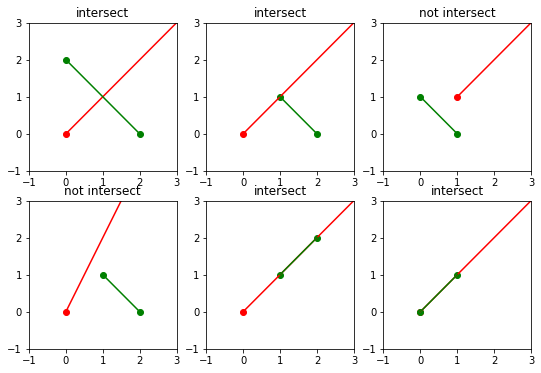

In [4]:
tests = [[[0, 0], [4, 4], [2, 0], [0, 2]],
         [[0, 0], [4, 4], [2, 0], [1, 1]],
         [[1, 1], [4, 4], [1, 0], [0, 1]],
         [[0, 0], [2, 4], [2, 0], [1, 1]],
         [[0, 0], [4, 4], [1, 1], [2, 2]],
         [[0, 0], [4, 4], [0, 0], [1, 1]]]

solutions.test_intersect(intersect)
solutions.show_examples(tests, intersect)

# Упражнение 2

* Задача:
    * дописать функцию проверки принадлежности точки не выпоклому многоугольнику
    * можно пользоваться поворотом, который уже написан (solutions.orientation)
* Формат входных данных:
    * points - массив с вершинами треугольника.
    * вершина задается следующим образом: [x,y], где x и y - координаты вершины
    * point = [x, y], где x и y - координаты точки, принадлежность которой надо проверить
* Формат выходных данных:
    * True, если точка внутри многоугольника
    * False иначе, если снаружи или на границе многоугольника

In [15]:
def check(points, point): 
# insert your code here...
   flage = 0
   for i in range(-1, len(points) - 1): #для каждого ребра делаем:
       if (solutions.isOnSegment(point, [points[i], points[i + 1]])): #если точка на ребре
           return False
       if (intersect([point,[point[0],point[1] + 1]],[points[i],points[i+1]])): #если ребро пересекает луч
           flage += 1
           continue
   return  flage % 2 == 1 #проверка четности счетчика

check = solutions.check

Давайте проверим алгоритм: 

P.S. неправильный тест будет изображон на картинке

passed 50 tests
passed 100 tests
passed 150 tests
All tests passed


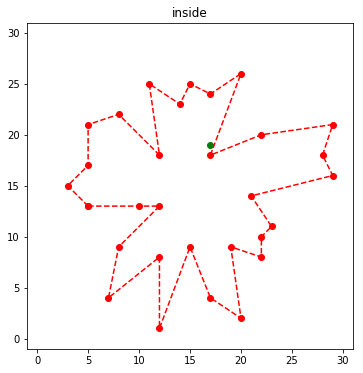

In [16]:
test=[[(5, 13), (10, 13), (12, 13), (8, 9), (7, 4), (12, 8), (12, 1), (15, 9), (17, 4), (20, 2), (19, 9), (22, 8), (22, 10), (23, 11), (21, 14), (29, 16), (28, 18), (29, 21), (22, 20), (17, 18), (20, 26), (17, 24), (15, 25), (14, 23), (11, 25), (12, 18), (8, 22), (5, 21), (5, 17), (3, 15)],
     [17, 19]]

solutions.test(check)
solutions.show_test(test,check)